# Customers Segmentation

In [21]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

import gc
import os


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cluster import KMeans


from sklearn.decomposition import PCA

root = 'E:/MINI_PROJECT/Data/'

## Data

In [26]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')
print(aisles.shape)

(134, 2)


For segmentation I am considering users from prior set only

In [27]:
order_products = order_products_prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(1048575, 15)

In [28]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


## Segmentation

In [29]:
cross_df = pd.crosstab(order_products.user_id, order_products.aisle)
cross_df.head()


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# normalization

In [30]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
10,0.0,0.013158,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013158
13,0.0,0.000000,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.000000
19,0.0,0.047619,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [31]:
df.shape

(69220, 134)

## PCA 


In [32]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.135030,-0.042313,-0.050995,-0.017837,-0.053231,-0.036588,-0.053058,-0.051999,0.036760,-0.192313
1,0.056080,-0.094005,-0.040769,0.137885,0.019666,-0.038279,-0.020442,-0.011857,-0.000701,-0.043249
2,-0.004803,0.124218,-0.020073,0.031227,-0.009154,-0.008667,-0.022545,-0.021961,-0.045808,0.042093
3,-0.125833,-0.029045,-0.049347,-0.016316,-0.055426,-0.016961,-0.018972,-0.025128,-0.010681,-0.024690
4,-0.077104,-0.042592,-0.048919,0.029152,-0.036591,-0.017008,-0.030701,-0.030568,-0.033624,0.006550


In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
  
    distortions.append(sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_pca.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_pca, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_pca.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [34]:
for key, val in mapping1.items():
    print(f'{key} : {val}')


1 : 0.2551800488854927
2 : 0.23058724439952644
3 : 0.21467771663865204
4 : 0.20693926376625743
5 : 0.19822928326627784
6 : 0.19363366225629225
7 : 0.18664971011702797
8 : 0.1820117401830696
9 : 0.17764623252209705


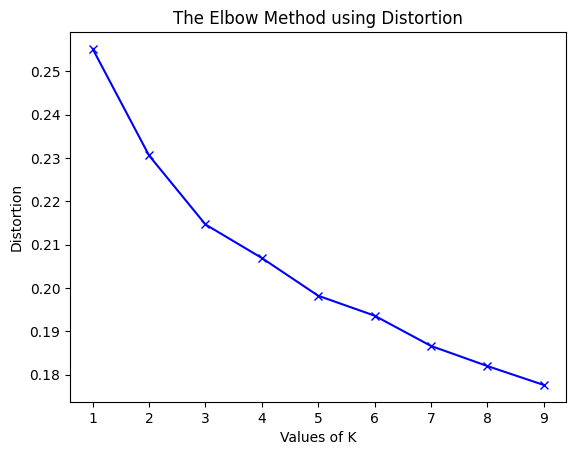

In [35]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [36]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 6349.2814974910925
2 : 5433.168328990578
3 : 4729.295709854729
4 : 4245.317189681306
5 : 3967.752840346438
6 : 3677.4997903908984
7 : 3417.585152743666
8 : 3252.7029598976005
9 : 3057.523294174629


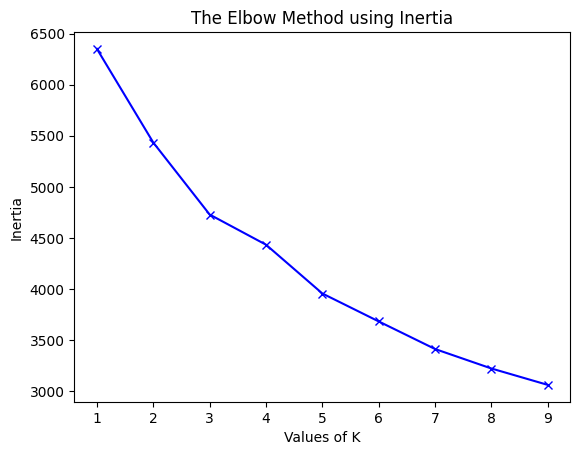

In [13]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From above plot we can choose optimal K as 5

In [20]:
kmeans = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = kmeans.cluster_centers_
c_preds = kmeans.predict(df_pca)
print(centers)

[[ 6.75078794e-02  1.05716214e-01 -1.14221567e-03 -3.09336722e-02
  -1.07022849e-02  7.22519835e-03 -5.20459612e-04  4.51699429e-03
  -7.21809510e-04 -1.62110197e-04]
 [-1.98201878e-01  1.61379566e-02  3.16916633e-01 -3.13692774e-02
   1.86339382e-02  5.63824625e-04  4.00980767e-03  1.09252685e-02
   1.24987471e-03 -3.82586044e-03]
 [-7.39220810e-02 -1.06013694e-02 -2.70272735e-02 -6.98749360e-03
  -6.75955555e-03  1.54272033e-03  5.07356097e-04 -2.53851662e-03
  -3.25362291e-04 -4.08354579e-04]
 [ 1.05576711e-01 -7.31240628e-02  1.72645917e-02  3.68233792e-03
   1.77184095e-03 -4.44698567e-03 -9.47749021e-04  1.29247553e-03
  -1.69956973e-04  7.73517904e-04]
 [-6.10643865e-03  1.30762099e-01  4.85881691e-03  2.30175559e-01
   1.10155079e-01 -2.28381841e-02  7.23054603e-05 -6.41373303e-03
   7.83909660e-03  3.04524352e-03]]


#### Visualizing clustering among first two principal components

In [21]:
temp_df = df_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

C:\Users\preetham\AppData\Local\Temp\ipykernel_21348\1558269435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,2
1,-0.036988,0.108884,0
2,0.064282,0.103962,0
3,-0.093210,0.054093,2
4,0.094629,-0.037051,3


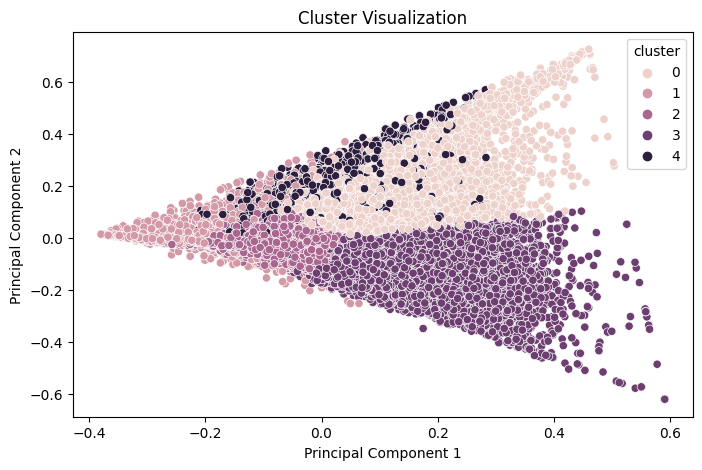

In [22]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

### Top products per cluster

In [23]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [24]:
cluster1.shape

(37925, 135)

In [25]:
cluster1.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,9,0
43,0,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,6,0


In [26]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     35.758523
fresh vegetables                 15.046276
packaged vegetables fruits       12.103995
yogurt                            9.895583
milk                              5.961556
packaged cheese                   5.115359
soy lactosefree                   3.779987
water seltzer sparkling water     3.613078
bread                             3.198392
chips pretzels                    3.134687
dtype: float64

In [27]:
cluster2.shape

(5417, 135)

In [35]:
cluster2.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,6,0,0,1
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,1
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,1
246,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,8,0,0,1
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,14,0,0,1


In [28]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
water seltzer sparkling water    20.946834
fresh fruits                      3.335979
soft drinks                       2.803397
yogurt                            2.255307
energy granola bars               1.556766
chips pretzels                    1.346686
tea                               1.329887
milk                              1.326749
packaged vegetables fruits        1.251061
soy lactosefree                   1.082518
dtype: float64

In [29]:
cluster3.shape

(99118, 135)

In [36]:
cluster3.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,2
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,2
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,2
11,1,1,0,0,0,0,4,0,0,0,...,0,6,0,0,0,0,10,0,10,2


In [30]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     9.767106
fresh vegetables                 7.571430
yogurt                           7.217559
packaged vegetables fruits       5.999536
packaged cheese                  4.931284
chips pretzels                   4.480750
milk                             4.252679
water seltzer sparkling water    4.091174
refrigerated                     3.257481
ice cream ice                    3.097833
dtype: float64

In [31]:
cluster4.shape

(55801, 135)

In [37]:
cluster4.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,3


In [32]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.044300
fresh fruits                     21.745578
packaged vegetables fruits       12.027186
yogurt                            6.159639
packaged cheese                   5.018996
fresh herbs                       4.151592
milk                              4.003118
soy lactosefree                   3.704844
frozen produce                    3.302073
water seltzer sparkling water     3.080626
dtype: float64

In [33]:
cluster5.shape

(7948, 135)

In [34]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 18.354051
fresh fruits                     10.877453
packaged vegetables fruits        4.240186
fresh vegetables                  3.105813
water seltzer sparkling water     1.714519
milk                              1.615627
packaged cheese                   1.544162
frozen produce                    1.144942
chips pretzels                    1.139155
nuts seeds dried fruit            1.033090
dtype: float64

Customer Segmentation Results:

- Cluster 1 results into 37925 consumers who have a very strong preference for fruits followed by fresh vegetables.
- Cluster 2 results into 5417 consumers having a very strong preference for water seltzer sparkling water aisle.
- Cluster 3 results into 99118 consumers who orders products from many aisles. Their mean orders are low compared to other clusters which tells us that either they are not frequent users of Instacart or they are new users and do not have many orders yet.
- Cluster 4 results into 55801 consumers who mostly order fresh vegetables followed by fruits.
- Cluster 5 results into 7948 consumers who buy packaged produce and fresh fruits mostly.